In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys


In [2]:
# Define the directory containing the .hea files
directory_path = r'C:\Users\hasee\OneDrive\Desktop\50each_multilabel\BothLeads\testing'

# Define the classes, normal class, and equivalent classes
classes = ['164889003', '164890007', '6374002', '426627000', '733534002',
           '713427006', '270492004', '251146004', '698252002', '426783006',
           '284470004', '10370003', '427393009', '426177001', '427084000',
           '426761007']

# Initialize an empty DataFrame with specified classes as columns
df_true_classes = pd.DataFrame(columns=classes)

for filename in os.listdir(directory_path):
    if filename.endswith('.hea'):
        file_path = os.path.join(directory_path, filename)

        with open(file_path, 'r') as file:
            content = file.read()

        dx_line = content.split('#Dx: ')[1].split('\n')[0]
        dx_codes = dx_line.split(',')

        row = {cls: 0 for cls in classes}

        for code in dx_codes:
            if code.strip() in row: 
                row[code.strip()] = 1

        df_true_classes = pd.concat([df_true_classes, pd.Series(row, name=filename[:-4]).to_frame().T])

print(df_true_classes.shape)


(800, 16)


In [3]:
# Directory path of CSVs
directory_path_predictions= r'C:\Users\hasee\OneDrive\Desktop\cinc2021\testing'

# Initialize an empty DataFrame for the predictions
predicted_df = pd.DataFrame(columns=classes)

for filename in os.listdir(directory_path_predictions):
    if filename.endswith('.csv'):  # Ensure to process only CSV files
        file_path = os.path.join(directory_path_predictions, filename)

        with open(file_path, 'r') as file:
            file.readline()  # Read and ignore the patient name line
            dx_codes = file.readline().strip().split(',')
            predictions = file.readline().strip().split(',')

        patient_row = {cls: 0 for cls in classes}

        for dx, pred in zip(dx_codes, predictions):
            if dx in patient_row:
                patient_row[dx] = int(pred)

        row_name = filename.split('.')[0]

        predicted_df = pd.concat([predicted_df, pd.Series(patient_row, name=row_name).to_frame().T])

print(predicted_df.shape)


(800, 16)


In [4]:
true_labels_df =  df_true_classes.copy()
# sort on index
true_labels_df.sort_index(inplace=True)

# save csv
true_labels_df.to_csv('true_labels.csv')

predicted_labels_df = predicted_df.copy()
# sort on index
predicted_labels_df.sort_index(inplace=True)
predicted_labels_df.head()

# save csv
predicted_labels_df.to_csv('predicted_labels.csv')

In [5]:
# Count the patients with each class
true_class_counts = true_labels_df.sum()    
print(true_class_counts)

# total class counts
print("Total True Classes:" , true_class_counts.sum())

164889003     68
164890007    129
6374002       50
426627000     51
733534002      8
713427006     27
270492004     78
251146004     53
698252002     63
426783006    122
284470004     59
10370003      62
427393009     61
426177001    124
427084000     90
426761007     51
dtype: object
Total True Classes: 1096


In [6]:
# Count the patients with each class
predicted_counts = predicted_labels_df.sum()    
print(predicted_counts)

# total class counts
print("Total Predicted Classes:" , predicted_counts.sum())

164889003    567
164890007    690
6374002      119
426627000     14
733534002      0
713427006      0
270492004    620
251146004     11
698252002    525
426783006    800
284470004      0
10370003     561
427393009     38
426177001    607
427084000    484
426761007     28
dtype: object
Total Predicted Classes: 5064


In [7]:
# Load the CSV files
true_labels_path = 'true_labels.csv'
predicted_labels_path = 'predicted_labels.csv'

true_labels_df = pd.read_csv(true_labels_path)
predicted_labels_df = pd.read_csv(predicted_labels_path)

# Define categories and initiate a new DataFrame
categories = true_labels_df.columns[1:].tolist() + ['Inconclusive']
new_df = pd.DataFrame(0, index=categories, columns=categories)

# Update the DataFrame based on comparison rules
for row in range(true_labels_df.shape[0]):
    true_row = true_labels_df.iloc[row, 1:]
    pred_row = predicted_labels_df.iloc[row, 1:]

    true_indices = true_row[true_row == 1].index.tolist()
    pred_indices = pred_row[pred_row == 1].index.tolist()

    min_length = min(len(true_indices), len(pred_indices))
    for i in range(min_length):
        new_df.loc[true_indices[i], pred_indices[i]] += 1

    for pred_index in pred_indices[min_length:]:
        new_df.loc['Inconclusive', pred_index] += 1

    for true_index in true_indices[min_length:]:
        new_df.loc[true_index, 'Inconclusive'] += 1
new_df


,164889003,164890007,6374002,426627000,733534002,713427006,270492004,251146004,698252002,426783006,284470004,10370003,427393009,426177001,427084000,426761007,Inconclusive
164889003,64,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164890007,121,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6374002,24,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426627000,28,13,0,7,0,0,1,0,0,2,0,0,0,0,0,0,0
733534002,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
713427006,9,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
270492004,37,30,0,0,0,0,9,0,0,2,0,0,0,0,0,0,0
251146004,24,17,1,0,0,0,7,1,0,3,0,0,0,0,0,0,0
698252002,18,31,1,0,0,0,6,0,1,5,0,0,0,0,1,0,0
426783006,44,27,9,0,0,0,15,0,0,25,0,0,0,0,0,0,2


In [8]:

# Calculate column sums
column_sums_final = new_df.sum(axis=0)

# Calculate row sums
row_sums_final = new_df.sum(axis=1)

# Calculate sum of true labels and predicted labels
true_labels_counts = true_labels_df.iloc[:, 1:].sum()
predicted_labels_counts = predicted_labels_df.iloc[:, 1:].sum()

# Compare column sums (excluding 'Inconclusive' for columns)
column_sums_comparison_final = column_sums_final[:-1] == predicted_labels_counts

# Corrected line: Compare row sums, appending 'Inconclusive' to true_labels_counts
row_sums_comparison_final = row_sums_final == pd.concat([true_labels_counts, pd.Series([0], index=['Inconclusive'])])

column_sums_comparison_final, row_sums_comparison_final


(164889003    True
 164890007    True
 6374002      True
 426627000    True
 733534002    True
 713427006    True
 270492004    True
 251146004    True
 698252002    True
 426783006    True
 284470004    True
 10370003     True
 427393009    True
 426177001    True
 427084000    True
 426761007    True
 dtype: bool,
 164889003        True
 164890007        True
 6374002          True
 426627000        True
 733534002        True
 713427006        True
 270492004        True
 251146004        True
 698252002        True
 426783006        True
 284470004        True
 10370003         True
 427393009        True
 426177001        True
 427084000        True
 426761007        True
 Inconclusive    False
 dtype: bool)

In [9]:
# Dictionary mapping codes to abbreviations
code_to_abbreviation = {
    '164889003': 'AFL',
    '164890007': 'AF',
    '6374002': 'BBB',
    '426627000': 'Brady',
    '733534002': 'CLBBB',
    '713427006': 'CRBBB',
    '270492004': 'IAVB',
    '251146004': 'LQV',
    '698252002': 'NICD',
    '426783006': 'SR',
    '284470004': 'PAC',
    '10370003': 'PR',
    '427393009': 'SA',
    '426177001': 'SB',
    '427084000': 'ST',
    '426761007': 'SVT'
}

In [10]:
#Calculate TP, FP, FN for each category
tp = pd.Series({category: new_df.loc[category, category] for category in categories[:-1]})  # Exclude 'Inconclusive'
fp = new_df.sum(axis=0)[:-1] - tp  # Exclude 'Inconclusive' from sum, then subtract TP for each category
fn = new_df.sum(axis=1)[:-1] - tp  # Exclude 'Inconclusive' from sum, then subtract TP for each category

class_metrics_df = pd.DataFrame({'TP': tp, 'FP': fp, 'FN': fn})

# TN is calculated by excluding the sum of the target row and column for each category from the total sum,
# and then adding back the TP (since it was excluded twice, once in row sum and once in column sum)
total_instances = sum(true_labels_df.iloc[:, 1:].sum())
tn = {}
for category in code_to_abbreviation.keys():
    # Total positives for the category (TP + FN)
    total_positives = true_labels_df[category].sum()
    
    # Total predicted positives for the category (TP + FP)
    total_predicted_positives = predicted_labels_df[category].sum()
    
    # TN is calculated as the total instances minus positives minus predicted positives plus TP
    tn[category] = total_instances - total_positives - total_predicted_positives + class_metrics_df.loc[category, 'TP']

# Add the corrected TN values to the metrics DataFrame
class_metrics_df['TN'] = pd.Series(tn)



class_metrics_df['Abbreviation'] = class_metrics_df.index.map(code_to_abbreviation)
class_metrics_df = class_metrics_df[['Abbreviation', 'TP', 'FP', 'FN','TN']]
class_metrics_df

,Abbreviation,TP,FP,FN,TN
164889003,AFL,64,503,4,525
164890007,AF,7,683,122,284
6374002,BBB,0,119,50,927
426627000,Brady,7,7,44,1038
733534002,CLBBB,0,0,8,1088
713427006,CRBBB,0,0,27,1069
270492004,IAVB,9,611,69,407
251146004,LQV,1,10,52,1033
698252002,NICD,1,524,62,509
426783006,SR,25,775,97,199


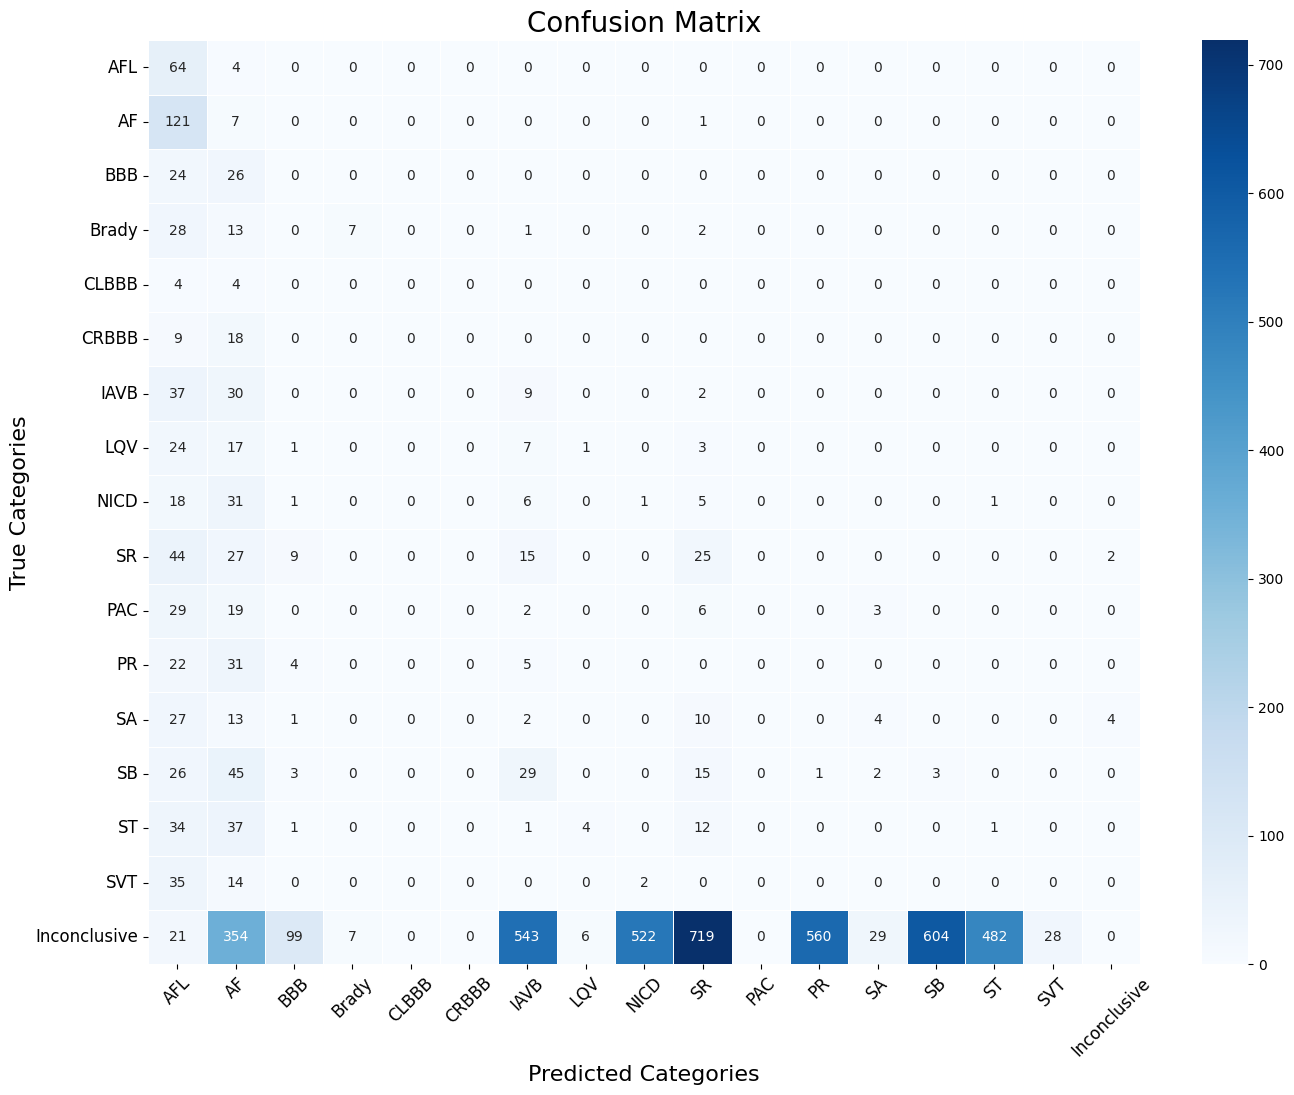

In [11]:
# Mapping the abbreviations to both rows and columns for the heatmap
new_df_mapped = new_df.rename(index=code_to_abbreviation, columns=code_to_abbreviation)

plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(new_df_mapped, annot=True, fmt="d", cmap="Blues", linewidths=.5)

# Title and labels
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Categories', fontsize=16)
plt.ylabel('True Categories', fontsize=16)

# Adjusting the ticks to improve readability
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 12, rotation=45)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 12, rotation=0)

plt.show()

In [12]:
# Calcularte Precision, Recall, F1 Score, and Accuracy
metrics_df = pd.DataFrame(index=class_metrics_df.index)

metrics_df['Precision'] = class_metrics_df['TP'] / (class_metrics_df['TP'] + class_metrics_df['FP'])
metrics_df['Recall'] = class_metrics_df['TP'] / (class_metrics_df['TP'] + class_metrics_df['FN'])
metrics_df['F1 Score'] = 2 * (metrics_df['Precision'] * metrics_df['Recall']) / (metrics_df['Precision'] + metrics_df['Recall'])
metrics_df['Accuracy'] = (class_metrics_df['TP'] + class_metrics_df['TN']) / (class_metrics_df['TP'] + class_metrics_df['TN'] + class_metrics_df['FP'] + class_metrics_df['FN'])

metrics_df['Abbreviation'] = class_metrics_df['Abbreviation']
metrics_df = metrics_df[['Abbreviation', 'Precision', 'Recall', 'F1 Score', 'Accuracy']]
metrics_df

,Abbreviation,Precision,Recall,F1 Score,Accuracy
164889003,AFL,0.112875,0.941176,0.201575,0.537409
164890007,AF,0.010145,0.054264,0.017094,0.265511
6374002,BBB,0.000000,0.000000,NaN,0.845803
426627000,Brady,0.500000,0.137255,0.215385,0.953467
733534002,CLBBB,NaN,0.000000,NaN,0.992701
713427006,CRBBB,NaN,0.000000,NaN,0.975365
270492004,IAVB,0.014516,0.115385,0.025788,0.379562
251146004,LQV,0.090909,0.018868,0.031250,0.943431
698252002,NICD,0.001905,0.015873,0.003401,0.465328
426783006,SR,0.031250,0.204918,0.054230,0.204380
